### **4주차 참고 코드1**
**[실습명: RNN을 활용한 주가 예측]**
- 데이터 출처 : https://github.com/celiaconcan/Tesla_Stock_Analysis/blob/master/Tesla.csv%20-%20Tesla.csv.csv
- 다른 stock data를 활용해보시는 걸 추천드립니다 :)

# 1. 라이브러리 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 2. 데이터 불러오기, train, validation set 나누기

In [ ]:
data = pd.read_csv("위 링크에서 데이터를 다운받아 주세요! ")

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
length_data = len(data)     # data 행 개수
split_ratio = 0.7           # 0.7 / 0.3 으로 분리
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1692
Train data length : 1184
Validation data lenth : 508


In [ ]:
train_data = data[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # 날짜 변수로 변환 -> 시계열화 (시각화)
train_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000
...,...,...
1179,2015-03-06,199.210007
1180,2015-03-09,194.389999
1181,2015-03-10,188.460007
1182,2015-03-11,191.149994


In [ ]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date']) # 시계열화
validation_data

,Date,Open
1184,2015-03-13,188.949997
1185,2015-03-16,192.000000
1186,2015-03-17,195.429993
1187,2015-03-18,194.960007
1188,2015-03-19,202.000000
...,...,...
1687,2017-03-13,244.820007
1688,2017-03-14,246.110001
1689,2017-03-15,257.000000
1690,2017-03-16,262.399994


#3. Train dataset 만들기

In [ ]:
dataset_train = train_data.Open.values # open 컬럼에 있는 변수만 가져오기
dataset_train.shape

(1184,)

In [ ]:
# 1차원 -> 2차원 데이터로 변환
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1184, 1)

#4. 정규화 / 피쳐 스케일링

데이터 값이 0 ~ 1 사이에 있게 하기 위해서

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1)) # min - max scaling 


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1184, 1)

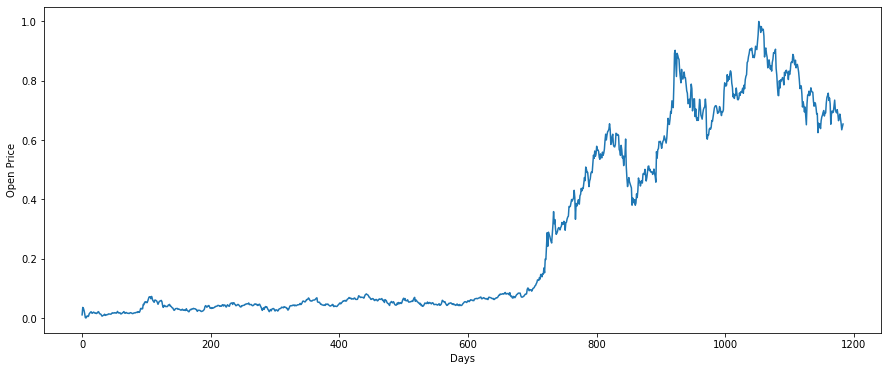

In [ ]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days")
plt.ylabel("Open Price")
plt.show()

# 5. X_train(맥락), y_train(예측)값 만들기

In [ ]:
X_train = []
y_train = []

time_step = 50 # 그 다음 값을 예측하기 위해(51번째) 50개의 데이터 사용

for i in range(time_step, length_train): # 한칸씩 이동하면서 계속 다음 값 예측 반복
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1134, 50)
Shape of y_train before reshape : (1134,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1134, 50, 1)
Shape of y_train after reshape : (1134, 1)


In [ ]:
# 50번째 값을 예측하기 위한 49개의 데이터 값
X_train[0]

array([[0.01053291],
       [0.03553936],
       [0.03262991],
       [0.02526425],
       [0.01421574],
       [0.00095754],
       [0.        ],
       [0.00530328],
       [0.00666594],
       [0.00460354],
       [0.00662911],
       [0.01399478],
       [0.01679373],
       [0.01926123],
       [0.02102899],
       [0.01664641],
       [0.01605716],
       [0.01859832],
       [0.01973999],
       [0.01756712],
       [0.0162413 ],
       [0.01705153],
       [0.01495231],
       [0.01605716],
       [0.01789858],
       [0.02139727],
       [0.01988731],
       [0.01458403],
       [0.01384746],
       [0.01292675],
       [0.00939123],
       [0.0061135 ],
       [0.00751299],
       [0.00850735],
       [0.01038559],
       [0.01270578],
       [0.00883881],
       [0.00924392],
       [0.01086436],
       [0.01145362],
       [0.01112216],
       [0.01381063],
       [0.01329503],
       [0.0131109 ],
       [0.01296358],
       [0.01281627],
       [0.0155784 ],
       [0.017

In [ ]:
# 50번째 값(예측해야할 대상)
y_train[0]

array([0.01789858])

#6. RNN Model 생성

In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# RNN 초기화
regressor = Sequential()

# 첫번째 RNN 계층 추가 + dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# 2번째 RNN 계층 추가

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# 3번째 RNN 계층 추가

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# 4번째 RNN 계층 추가

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# 출력층 계층 추가
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN # 배치 크기 = 32, epoch = 50
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
36/36 [==============================] - 5s 40ms/step - loss: 0.2659 - accuracy: 0.0000e+00
Epoch 2/50
36/36 [==============================] - 1s 40ms/step - loss: 0.1978 - accuracy: 8.8183e-04
Epoch 3/50
36/36 [==============================] - 2s 46ms/step - loss: 0.1313 - accuracy: 8.8183e-04
Epoch 4/50
36/36 [==============================] - 2s 43ms/step - loss: 0.1035 - accuracy: 8.8183e-04
Epoch 5/50
36/36 [==============================] - 2s 63ms/step - loss: 0.0628 - accuracy: 8.8183e-04
Epoch 6/50
36/36 [==============================] - 3s 75ms/step - loss: 0.0523 - accuracy: 8.8183e-04
Epoch 7/50
36/36 [==============================] - 1s 41ms/step - loss: 0.0371 - accuracy: 8.8183e-04
Epoch 8/50
36/36 [==============================] - 2s 42ms/step - loss: 0.0324 - accuracy: 8.8183e-04
Epoch 9/50
36/36 [==============================] - 2s 42ms/step - loss: 0.0280 - accuracy: 8.8183e-04
Epoch 10/50
36/36 [==============================] - 2s 45ms/step - loss:

In [ ]:
# Losses
history.history["loss"]

[0.2659148871898651,
 0.19784793257713318,
 0.1312958300113678,
 0.10352647304534912,
 0.06280914694070816,
 0.052291389554739,
 0.0370926707983017,
 0.03242936730384827,
 0.027961529791355133,
 0.02811151184141636,
 0.02480218932032585,
 0.0210098996758461,
 0.022079311311244965,
 0.016922159120440483,
 0.018269546329975128,
 0.0161190927028656,
 0.013799630105495453,
 0.011953205801546574,
 0.01288716122508049,
 0.013299682177603245,
 0.011850649490952492,
 0.009970051236450672,
 0.011278102174401283,
 0.008260725066065788,
 0.008087179623544216,
 0.009212428703904152,
 0.009321978315711021,
 0.008969019167125225,
 0.007303545717149973,
 0.007055806461721659,
 0.006835216656327248,
 0.006394717376679182,
 0.006304861977696419,
 0.0059822541661560535,
 0.00571620324626565,
 0.006326216738671064,
 0.0056174458004534245,
 0.005870603024959564,
 0.0050723617896437645,
 0.004999110475182533,
 0.004789926577359438,
 0.004850437864661217,
 0.004639401100575924,
 0.004746695514768362,
 0.004

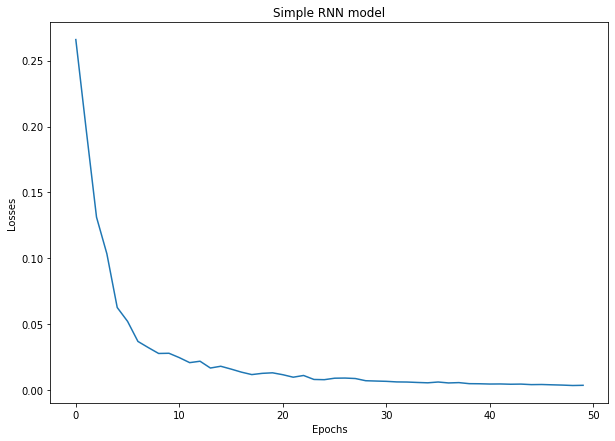

In [ ]:
# 에폭대비 loss 값 비교
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model")
plt.show()

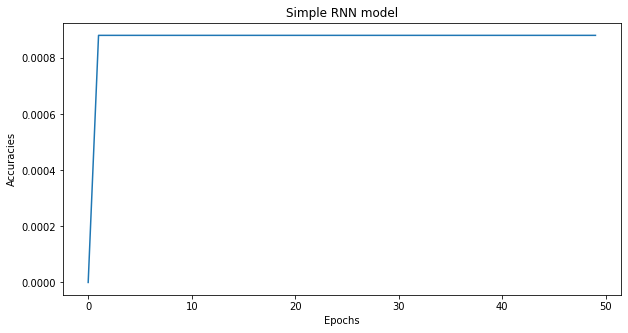

In [ ]:
# 에폭대비 acuuracy 값 비교
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model")
plt.show()

# 훈련 데이터에 대한 모델 예측

In [ ]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original 예측값 -> 원래 값으로 변화
y_pred.shape

(1134, 1)

In [ ]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1134, 1)

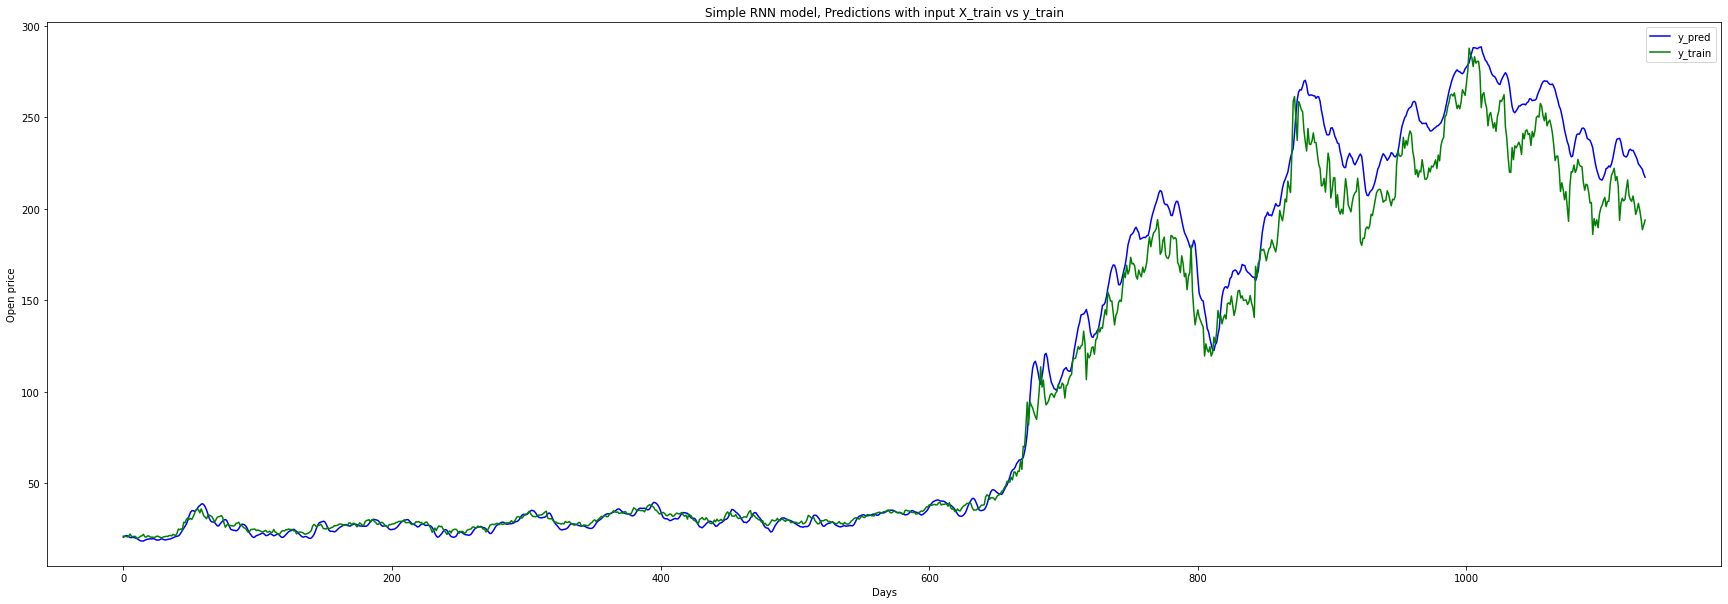

In [ ]:
# 시각화(open price에 대한 모델 예측)
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

# 8. validation set에서 test dataset 만들기

In [ ]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (508, 1)


## x_test과 y_test 데이터 셋 생성

In [ ]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [ ]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (458, 50)
Shape of y_test before reshape : (458,)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [ ]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (458, 50, 1)
Shape of y_test after reshape : (458, 1)


#9. validation data로부터 모델 예측값 평가

In [ ]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

Shape of y_pred_of_test : (458, 1)


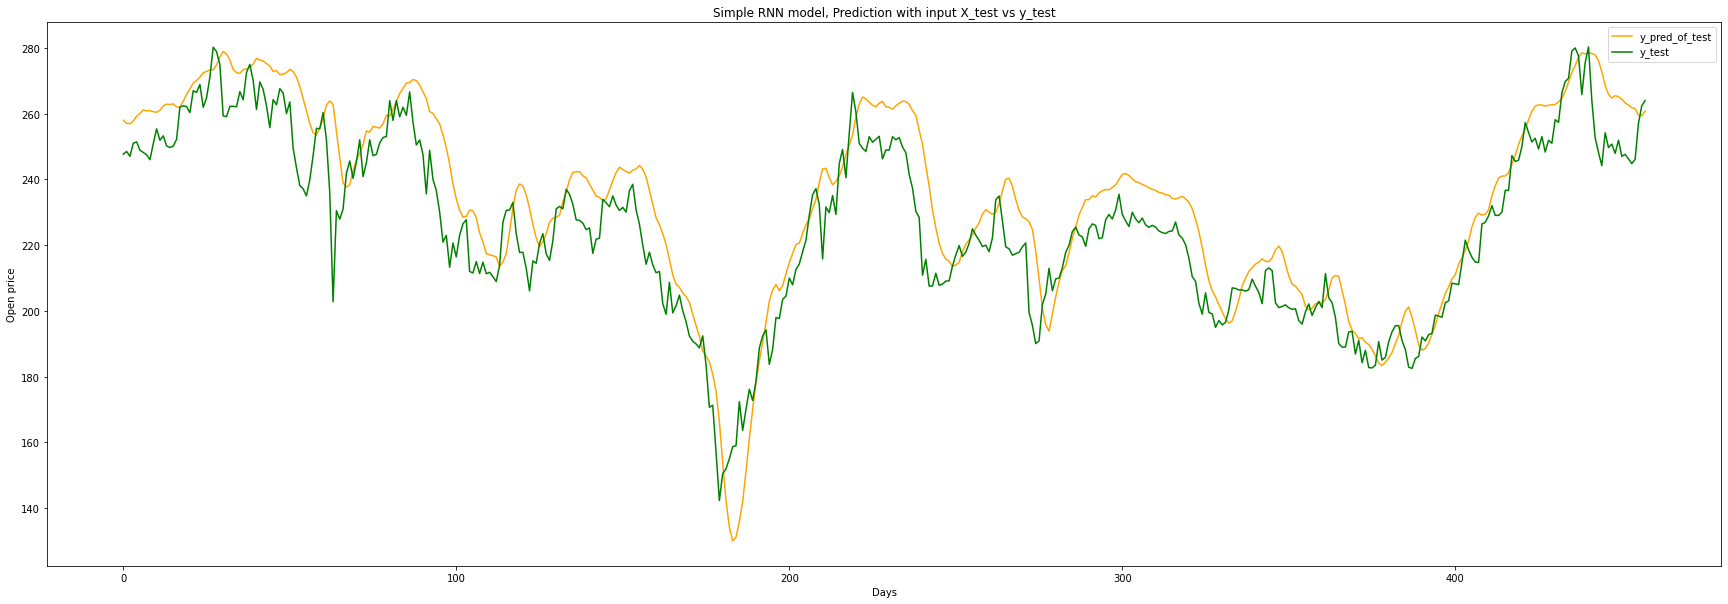

In [ ]:
# 시각화 
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test") # 예측값과 실제값의 차이
plt.legend()
plt.show()

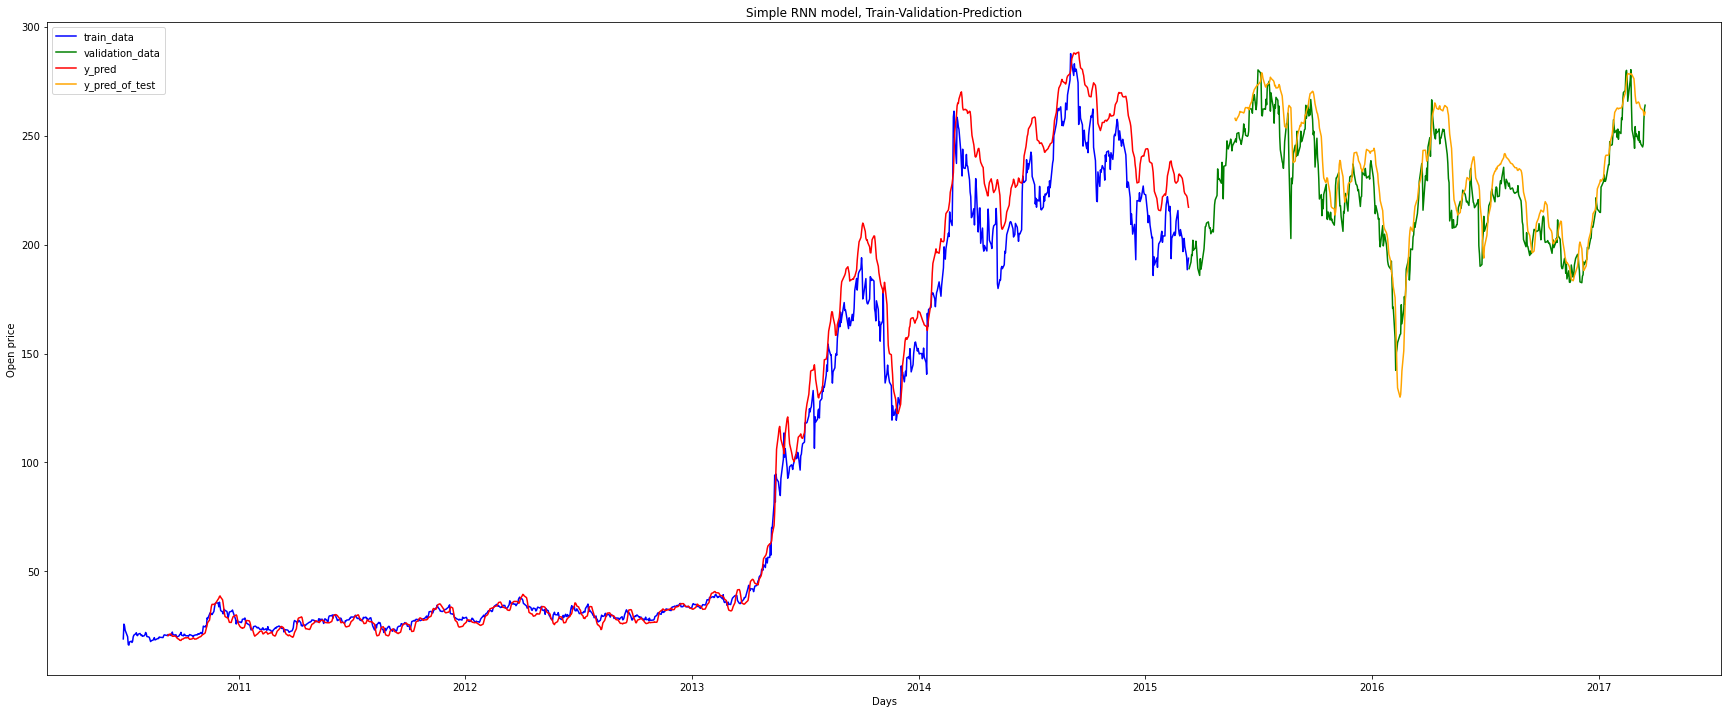

In [ ]:
# 시각화 (train - validation - prediction)
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()